<a href="https://colab.research.google.com/github/rajansingh387/projects/blob/main/practice_facebook_ads_data_set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded= files.upload()

Saving Facebook clustering.csv to Facebook clustering.csv


In [ ]:
a= pd.read_csv('Facebook clustering.csv')

In [ ]:
df= pd.DataFrame(a)

In [ ]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [ ]:
df.shape

(1143, 11)

In [ ]:
df.columns

Index(['ad_id', 'xyz_campaign_id', 'fb_campaign_id', 'age', 'gender',
       'interest', 'Impressions', 'Clicks', 'Spent', 'Total_Conversion',
       'Approved_Conversion'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [ ]:
df.dtypes

ad_id                    int64
xyz_campaign_id          int64
fb_campaign_id           int64
age                     object
gender                  object
interest                 int64
Impressions              int64
Clicks                   int64
Spent                  float64
Total_Conversion         int64
Approved_Conversion      int64
dtype: object

In [ ]:
df.nunique()

ad_id                  1143
xyz_campaign_id           3
fb_campaign_id          691
age                       4
gender                    2
interest                 40
Impressions            1130
Clicks                  183
Spent                   869
Total_Conversion         32
Approved_Conversion      16
dtype: int64

In [ ]:
for i in df.columns:
  if df[i].nunique()<10:
    print(f'the columns {i} is _{df[i].dtype}__ \nhas__{df[i].nunique()}__ unique values:\n{df[i].value_counts()}')
  else:
    print(f'the columns {i} is __{df[i].dtype}__ \nhas {df[i].nunique()} unique values')

the columns ad_id is __int64__ 
has 1143 unique values
the columns xyz_campaign_id is _int64__ 
has__3__ unique values:
1178    625
936     464
916      54
Name: xyz_campaign_id, dtype: int64
the columns fb_campaign_id is __int64__ 
has 691 unique values
the columns age is _object__ 
has__4__ unique values:
30-34    426
45-49    259
35-39    248
40-44    210
Name: age, dtype: int64
the columns gender is _object__ 
has__2__ unique values:
M    592
F    551
Name: gender, dtype: int64
the columns interest is __int64__ 
has 40 unique values
the columns Impressions is __int64__ 
has 1130 unique values
the columns Clicks is __int64__ 
has 183 unique values
the columns Spent is __float64__ 
has 869 unique values
the columns Total_Conversion is __int64__ 
has 32 unique values
the columns Approved_Conversion is __int64__ 
has 16 unique values


In [ ]:
df.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


In [ ]:
print('{}'.format(df.shape[0]))

1143


In [ ]:

print('Total ADS: {}'.format(df.shape[0]))


Total ADS: 1143


In [ ]:
df.var()

ad_id                  3.763321e+10
xyz_campaign_id        1.479371e+04
fb_campaign_id         4.202627e+08
interest               7.264174e+02
Impressions            9.782018e+10
Clicks                 3.236750e+03
Spent                  7.553073e+03
Total_Conversion       2.010261e+01
Approved_Conversion    3.019629e+00
dtype: float64

In [ ]:
df1= df.copy()

In [ ]:
df1.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [ ]:
df1.dtypes

ad_id                    int64
xyz_campaign_id          int64
fb_campaign_id           int64
age                     object
gender                  object
interest                 int64
Impressions              int64
Clicks                   int64
Spent                  float64
Total_Conversion         int64
Approved_Conversion      int64
dtype: object

In [ ]:
df1['interest'].value_counts()

16     140
10      85
29      77
27      60
15      51
28      51
20      49
64      48
63      46
18      43
26      41
21      36
32      33
22      33
19      32
25      26
31      25
30      25
2       25
7       24
24      24
23      23
36      21
65      19
66      11
107      8
110      8
102      7
105      7
101      7
112      7
108      7
100      6
111      6
113      6
109      6
103      5
114      5
104      5
106      5
Name: interest, dtype: int64

In [ ]:
df1.columns

Index(['ad_id', 'xyz_campaign_id', 'fb_campaign_id', 'age', 'gender',
       'interest', 'Impressions', 'Clicks', 'Spent', 'Total_Conversion',
       'Approved_Conversion'],
      dtype='object')

In [ ]:
categories = ['ad_id', 'fb_campaign_id','age', 'gender', 'xyz_campaign_id', 'interest']
print(categories)
df1[categories] = df1[categories].astype('category')
#df1.head()

['ad_id', 'fb_campaign_id', 'age', 'gender', 'xyz_campaign_id', 'interest']


In [ ]:
df1.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


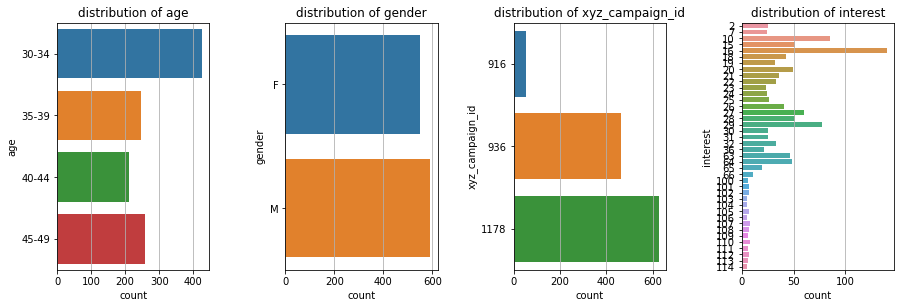

In [ ]:
x= 0
fig= plt.figure(figsize=(15,10))
plt.subplots_adjust(wspace= 0.5)

for i in df1[categories[2:]]:
  ax= plt.subplot(241+x)
  ax= sns.countplot(data= df1, y= i)
  plt.grid(axis= 'x')
  ax.set_title(f'distribution of {i}')
  x+=1

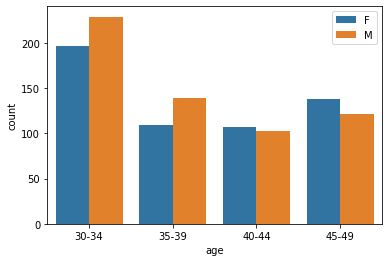

In [ ]:
sns.countplot(x= df1['age'], hue= df1['gender'])
plt.legend()

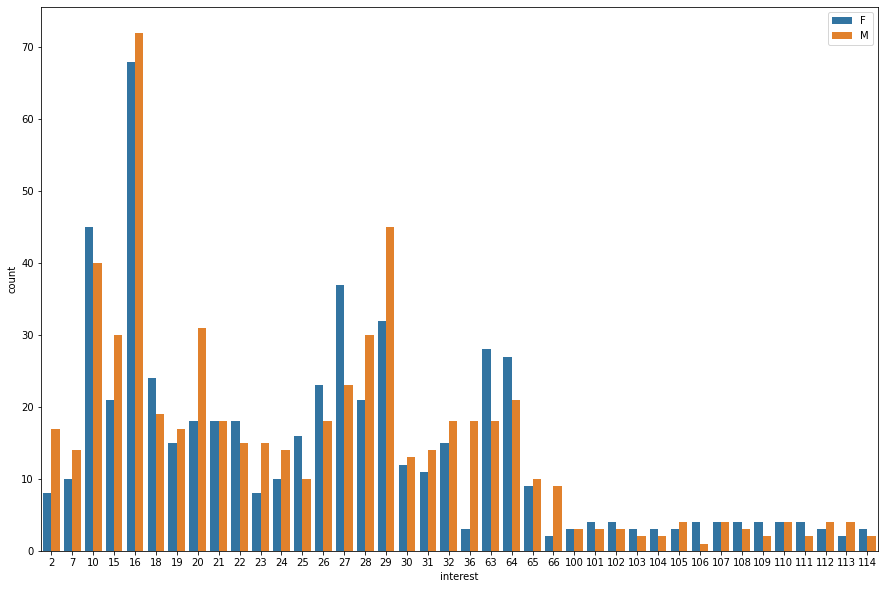

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(x= df1['interest'], hue= df1['gender'])
plt.legend()

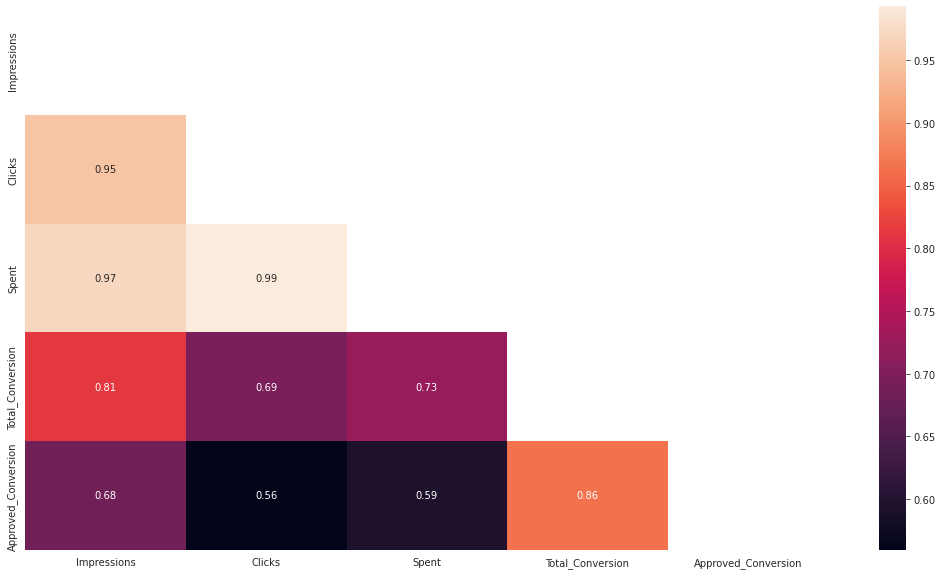

In [ ]:
corr= df1.corr()
mask= np.zeros_like(corr)
mask[np.triu_indices_from(mask)]= True
with sns.axes_style('white'):
  fig,ax= plt.subplots(figsize=(18,10))
  sns.heatmap(corr,mask= mask, annot= True)

<Axes: >

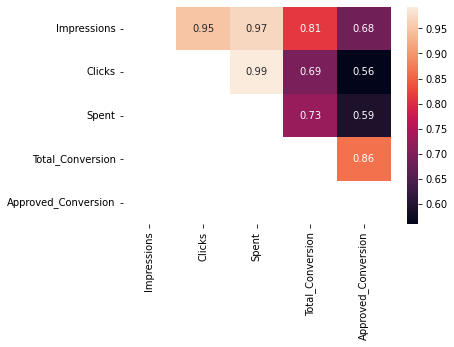

In [ ]:
mask = np.zeros_like(corr)
mask[np.tril_indices_from(mask)]= True
sns.heatmap(corr,mask= mask,annot= True)

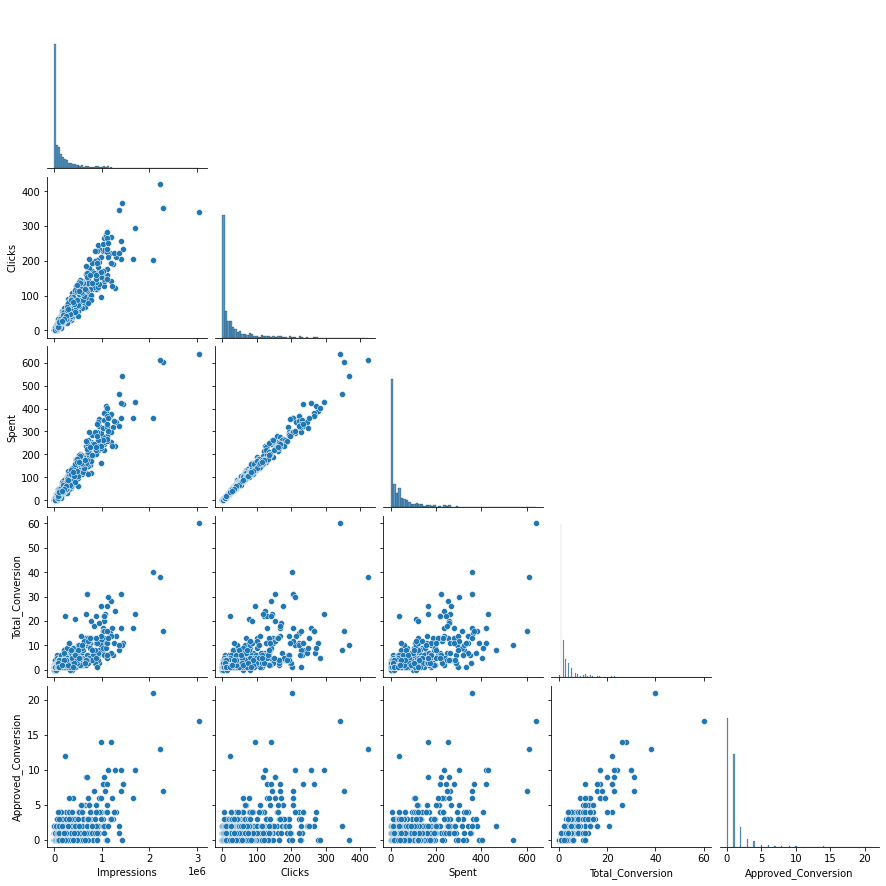

In [ ]:
sns.pairplot(df1, corner= True)

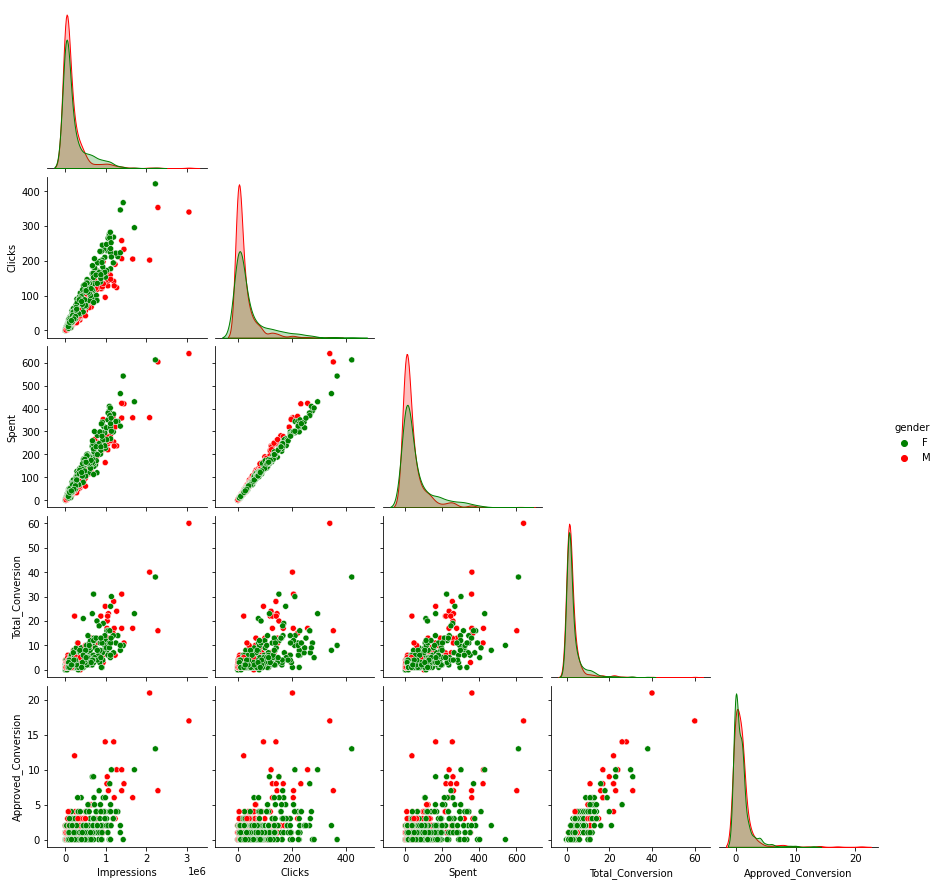

In [ ]:
sns.pairplot(df1, hue= 'gender', corner= True, palette= ['green','red'])

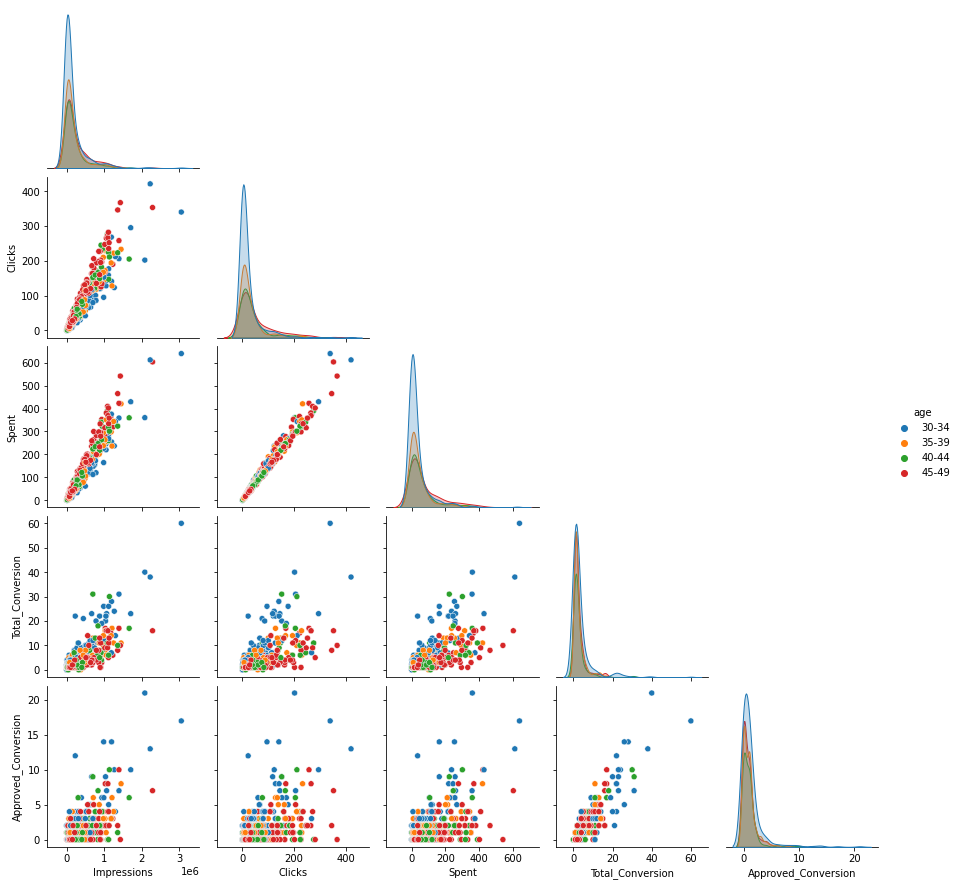

In [ ]:
sns.pairplot(df1, hue= 'age', corner= True)

In [ ]:
df1.rename(columns=str.lower, inplace= True)

Text(0.5, 1.0, 'Distribution of "APPROVED_CONVERSION"')

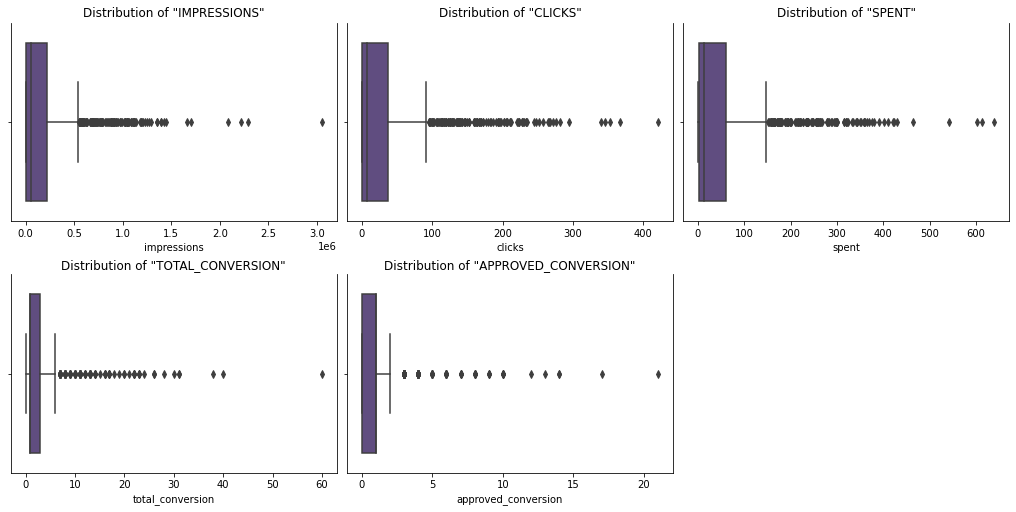

In [ ]:
# Show axes
plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.spines.right'] = True
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = True

# Distribution of our numerical variables using boxplots
fig, axes = plt.subplots(2, 3, figsize=(14, 7), constrained_layout =True)
plt.subplots_adjust(wspace = 2, hspace=2)
axes[-1, -1].axis('off') # hide axes
 
ax = sns.boxplot(ax = axes[0,0], data=df1, x='impressions', color='#5E4489')
ax.set_title(f'Distribution of "IMPRESSIONS"')
 
ax1 = sns.boxplot(ax = axes[0,1], data=df1, x='clicks', color='#5E4489')
ax1.set_title(f'Distribution of "CLICKS"')
 
ax2 = sns.boxplot(ax = axes[0,2], data=df1, x='spent', color='#5E4489')
ax2.set_title(f'Distribution of "SPENT"')
 
ax3 = sns.boxplot(ax = axes[1,0], data=df1, x='total_conversion', color='#5E4489')
ax3.set_title(f'Distribution of "TOTAL_CONVERSION"')
 
ax4 = sns.boxplot(ax = axes[1,1], data=df1, x='approved_conversion', color='#5E4489')
ax4.set_title(f'Distribution of "APPROVED_CONVERSION"')

In [ ]:
df1.columns

Index(['ad_id', 'xyz_campaign_id', 'fb_campaign_id', 'age', 'gender',
       'interest', 'impressions', 'clicks', 'spent', 'total_conversion',
       'approved_conversion'],
      dtype='object')

In [ ]:
avg_spending_age= df1.groupby(['age'])['spent'].mean().sort_values().reset_index()
avg_spending_age

,age,spent
0,30-34,35.803756
1,35-39,44.808185
2,40-44,55.189190
3,45-49,80.118417


In [ ]:
avg_spending_gender= df1.groupby(['gender'])['spent'].mean().sort_values().reset_index()
avg_spending_gender

,gender,spent
0,M,40.882787
1,F,62.618185


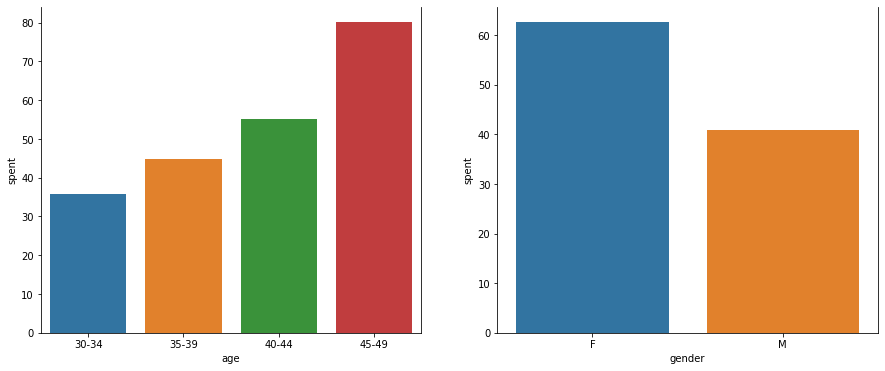

In [ ]:
fig, axes= plt.subplots(1,2,figsize=(15,6))
ax= sns.barplot(avg_spending_age,x= 'age',y='spent',ax= axes[0])
ax1= sns.barplot(avg_spending_gender,x= 'gender',y='spent',ax= axes[1])

In [ ]:
mean_spending_topic= df1.groupby('interest')['spent'].mean().sort_values().reset_index()
mean_spending_topic

,interest,spent
0,36,9.797143
1,31,11.964000
2,2,20.138000
3,66,20.978182
4,21,22.894722
5,30,24.665200
6,23,25.897826
7,7,27.038750
8,24,27.919167
9,65,28.526842


<Axes: xlabel='interest', ylabel='spent'>

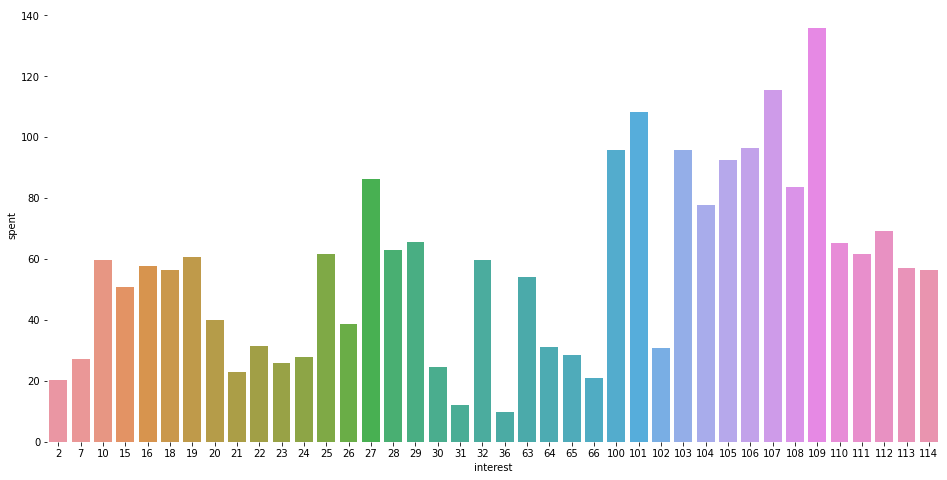

In [ ]:
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = False

plt.figure(figsize=(16,8))
sns.barplot(mean_spending_topic,x= 'interest',y='spent')

In [ ]:
total_converstion = df1.groupby('fb_campaign_id')[['impressions','clicks','spent']].mean()
total_converstion

,impressions,clicks,spent
fb_campaign_id,,,
103916,7350.0,1.0,1.430000
103917,17861.0,2.0,1.820000
103920,693.0,0.0,0.000000
103928,4196.0,1.0,1.270000
103929,1915.0,0.0,0.000000
...,...,...,...
179977,1129773.0,252.0,358.189997
179978,637549.0,120.0,173.880003
179979,151531.0,28.0,40.289999


In [ ]:
data= pd.DataFrame(total_converstion)

In [ ]:
data

,impressions,clicks,spent
fb_campaign_id,,,
103916,7350.0,1.0,1.430000
103917,17861.0,2.0,1.820000
103920,693.0,0.0,0.000000
103928,4196.0,1.0,1.270000
103929,1915.0,0.0,0.000000
...,...,...,...
179977,1129773.0,252.0,358.189997
179978,637549.0,120.0,173.880003
179979,151531.0,28.0,40.289999


In [ ]:
total_converstion.values

array([[7.35000000e+03, 1.00000000e+00, 1.42999995e+00],
       [1.78610000e+04, 2.00000000e+00, 1.82000002e+00],
       [6.93000000e+02, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.51531000e+05, 2.80000000e+01, 4.02899995e+01],
       [7.90253000e+05, 1.35000000e+02, 1.98710001e+02],
       [5.13161000e+05, 1.14000000e+02, 1.65609999e+02]])

In [ ]:
sc= StandardScaler()
scaled= sc.fit_transform(total_converstion)
scaled

array([[-0.54421246, -0.52820627, -0.53751754],
       [-0.49697268, -0.50480229, -0.53131265],
       [-0.57413114, -0.55161025, -0.56026878],
       ...,
       [ 0.10378284,  0.1037012 ,  0.08074336],
       [ 2.97440278,  2.60792708,  2.60119867],
       [ 1.72906315,  2.1164435 ,  2.07457908]])

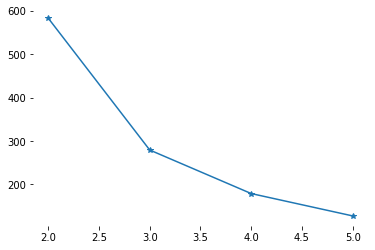

In [ ]:
ks = range(2,6)
inertias= []
for k in ks:
  model= KMeans(n_clusters= k)
  cluster= model.fit(scaled)
  inertias.append(model.inertia_)
plt.plot(ks,inertias,marker='*')

In [ ]:
model= KMeans(n_clusters=3)
model.fit(scaled)

KMeans(n_clusters=3)

In [ ]:
data['cluster']= model.predict(scaled)
data['cluster'].value_counts()

0    559
2    101
1     31
Name: cluster, dtype: int64

In [ ]:
data.head()

,impressions,clicks,spent,cluster
fb_campaign_id,,,,
103916,7350.0,1.0,1.43,0
103917,17861.0,2.0,1.82,0
103920,693.0,0.0,0.00,0
103928,4196.0,1.0,1.27,0
103929,1915.0,0.0,0.00,0


<Axes: xlabel='impressions', ylabel='clicks'>

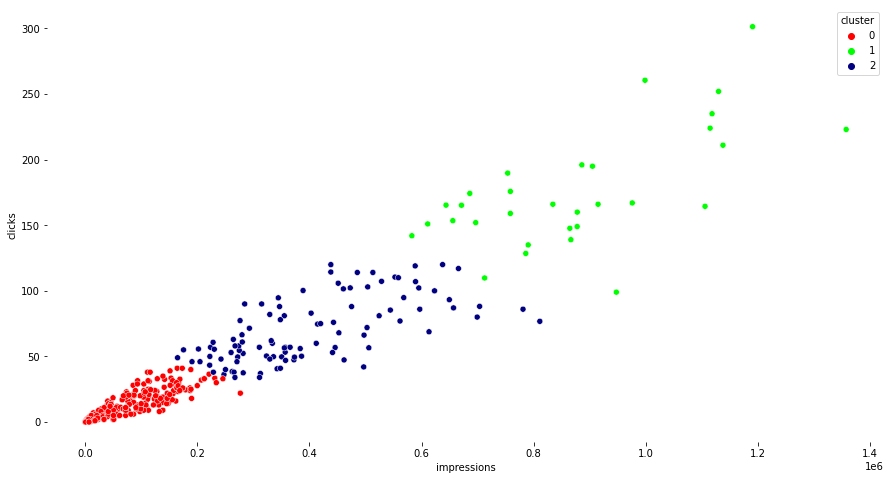

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(data,x= 'impressions',y= 'clicks',hue= 'cluster', palette=['#FF0000', '#00FF00', '#000080'])


<Axes: xlabel='impressions', ylabel='spent'>

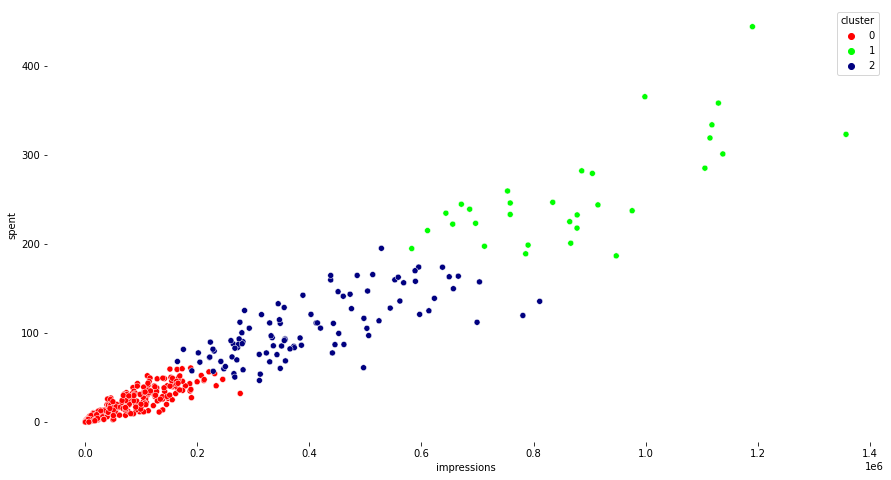

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(data,x= 'impressions',y= 'spent',hue= 'cluster', palette=['#FF0000', '#00FF00', '#000080'])


In [ ]:
df1.columns

Index(['ad_id', 'xyz_campaign_id', 'fb_campaign_id', 'age', 'gender',
       'interest', 'impressions', 'clicks', 'spent', 'total_conversion',
       'approved_conversion'],
      dtype='object')